# **Importing all the libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve
from sklearn.linear_model import Lasso, Ridge
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

import warnings
warnings.filterwarnings("ignore")

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df= pd.read_csv('/kaggle/input/cardiovascular-diseases-risk-prediction-dataset/CVD_cleaned.csv')

# **Data Preprocessing and EDA**

In [3]:
df.head()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150.0,32.66,14.54,Yes,0.0,30.0,16.0,12.0
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165.0,77.11,28.29,No,0.0,30.0,0.0,4.0
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,163.0,88.45,33.47,No,4.0,12.0,3.0,16.0
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,180.0,93.44,28.73,No,0.0,30.0,30.0,8.0
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,191.0,88.45,24.37,Yes,0.0,8.0,4.0,0.0


In [4]:
str(df)

'       General_Health                  Checkup Exercise Heart_Disease  \\\n0                Poor  Within the past 2 years       No            No   \n1           Very Good     Within the past year       No           Yes   \n2           Very Good     Within the past year      Yes            No   \n3                Poor     Within the past year      Yes           Yes   \n4                Good     Within the past year       No            No   \n...               ...                      ...      ...           ...   \n308849      Very Good     Within the past year      Yes            No   \n308850           Fair  Within the past 5 years      Yes            No   \n308851      Very Good      5 or more years ago      Yes            No   \n308852      Very Good     Within the past year      Yes            No   \n308853      Excellent     Within the past year      Yes            No   \n\n       Skin_Cancer Other_Cancer Depression  \\\n0               No           No         No   \n1            

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308854 entries, 0 to 308853
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   General_Health                308854 non-null  object 
 1   Checkup                       308854 non-null  object 
 2   Exercise                      308854 non-null  object 
 3   Heart_Disease                 308854 non-null  object 
 4   Skin_Cancer                   308854 non-null  object 
 5   Other_Cancer                  308854 non-null  object 
 6   Depression                    308854 non-null  object 
 7   Diabetes                      308854 non-null  object 
 8   Arthritis                     308854 non-null  object 
 9   Sex                           308854 non-null  object 
 10  Age_Category                  308854 non-null  object 
 11  Height_(cm)                   308854 non-null  float64
 12  Weight_(kg)                   308854 non-nul

In [6]:
df.shape

(308854, 19)

Check for null values

In [7]:
#check for null values
df.isnull().sum()

General_Health                  0
Checkup                         0
Exercise                        0
Heart_Disease                   0
Skin_Cancer                     0
Other_Cancer                    0
Depression                      0
Diabetes                        0
Arthritis                       0
Sex                             0
Age_Category                    0
Height_(cm)                     0
Weight_(kg)                     0
BMI                             0
Smoking_History                 0
Alcohol_Consumption             0
Fruit_Consumption               0
Green_Vegetables_Consumption    0
FriedPotato_Consumption         0
dtype: int64

In [8]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Height_(cm),308854.0,170.615249,10.658026,91.00,163.00,170.00,178.00,241.00
Weight_(kg),308854.0,83.588655,21.343210,24.95,68.04,81.65,95.25,293.02
BMI,308854.0,28.626211,6.522323,12.02,24.21,27.44,31.85,99.33
Alcohol_Consumption,308854.0,5.096366,8.199763,0.00,0.00,1.00,6.00,30.00
Fruit_Consumption,308854.0,29.835200,24.875735,0.00,12.00,30.00,30.00,120.00
Green_Vegetables_Consumption,308854.0,15.110441,14.926238,0.00,4.00,12.00,20.00,128.00
FriedPotato_Consumption,308854.0,6.296616,8.582954,0.00,2.00,4.00,8.00,128.00


Check for Duplicate Values, drop if any

In [9]:
#check duplicate values
df.duplicated().sum()


80

In [10]:
#drop the duplicated values
df.drop_duplicates()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150.0,32.66,14.54,Yes,0.0,30.0,16.0,12.0
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165.0,77.11,28.29,No,0.0,30.0,0.0,4.0
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,163.0,88.45,33.47,No,4.0,12.0,3.0,16.0
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,180.0,93.44,28.73,No,0.0,30.0,30.0,8.0
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,191.0,88.45,24.37,Yes,0.0,8.0,4.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308849,Very Good,Within the past year,Yes,No,No,No,No,No,No,Male,25-29,168.0,81.65,29.05,No,4.0,30.0,8.0,0.0
308850,Fair,Within the past 5 years,Yes,No,No,No,No,Yes,No,Male,65-69,180.0,69.85,21.48,No,8.0,15.0,60.0,4.0
308851,Very Good,5 or more years ago,Yes,No,No,No,Yes,"Yes, but female told only during pregnancy",No,Female,30-34,157.0,61.23,24.69,Yes,4.0,40.0,8.0,4.0
308852,Very Good,Within the past year,Yes,No,No,No,No,No,No,Male,65-69,183.0,79.38,23.73,No,3.0,30.0,12.0,0.0


In [11]:
df.shape

(308854, 19)

In [12]:
#Checking the number of unique values
df.select_dtypes(include='object').nunique()

General_Health      5
Checkup             5
Exercise            2
Heart_Disease       2
Skin_Cancer         2
Other_Cancer        2
Depression          2
Diabetes            4
Arthritis           2
Sex                 2
Age_Category       13
Smoking_History     2
dtype: int64

# **Visualizing the data**

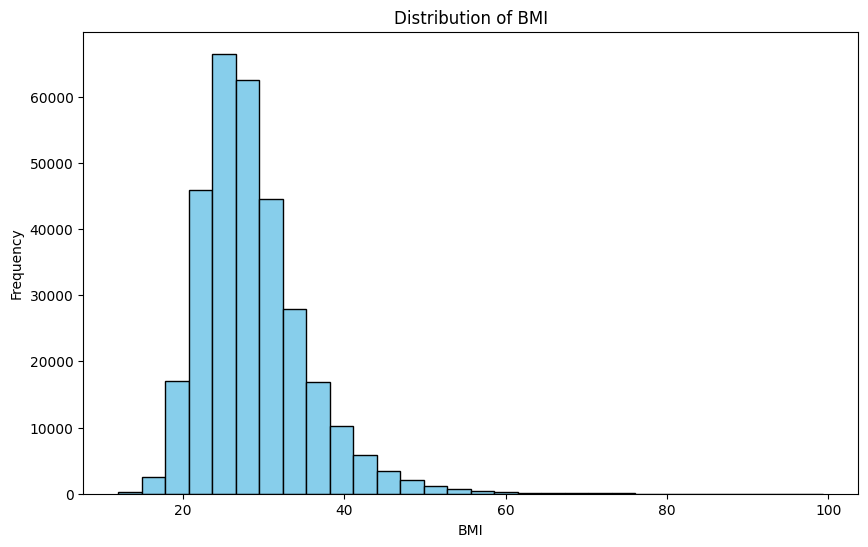

In [13]:
#histogram for BMI
plt.figure(figsize=(10, 6))
plt.hist(df['BMI'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of BMI')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.show()


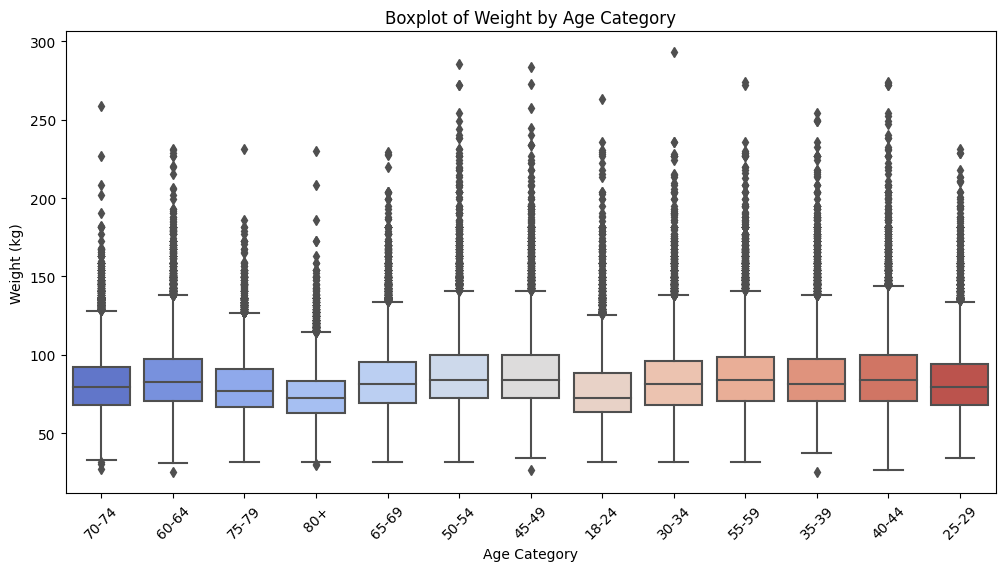

In [14]:
#boxplot for Age_category and Weight_(kg)
plt.figure(figsize=(12, 6))
sns.boxplot(x='Age_Category', y='Weight_(kg)', data=df, palette='coolwarm')
plt.title('Boxplot of Weight by Age Category')
plt.xlabel('Age Category')
plt.ylabel('Weight (kg)')
plt.xticks(rotation=45)
plt.show()

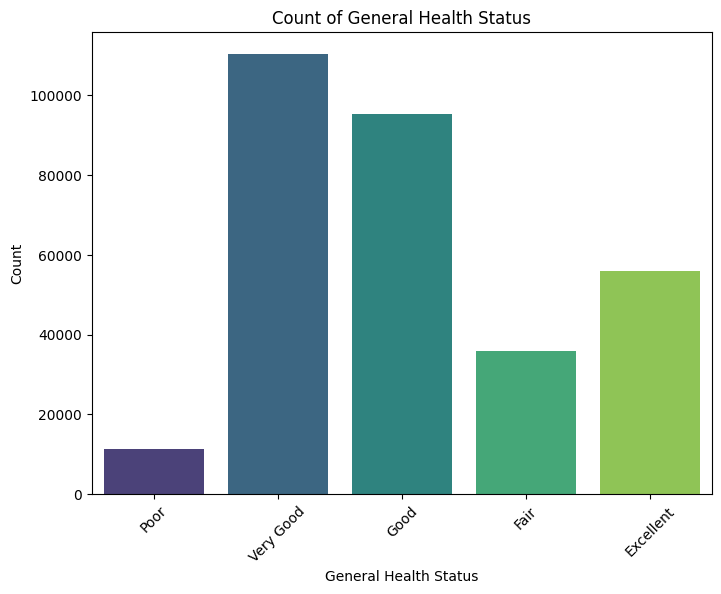

In [15]:
#Count plot for General_Health
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='General_Health', palette='viridis')
plt.title('Count of General Health Status')
plt.xlabel('General Health Status')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


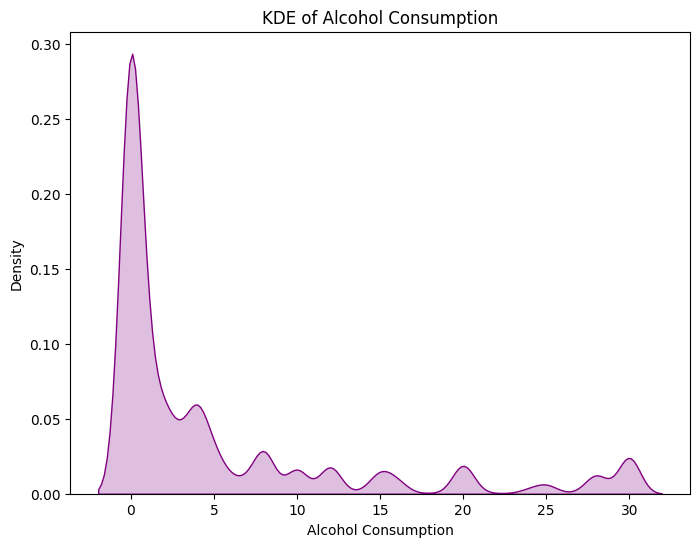

In [16]:
#Kernel Density Estimation (KDE) for Alcohol_Consumption:
plt.figure(figsize=(8, 6))
sns.kdeplot(df['Alcohol_Consumption'], shade=True, color='purple')
plt.title('KDE of Alcohol Consumption')
plt.xlabel('Alcohol Consumption')
plt.ylabel('Density')
plt.show()

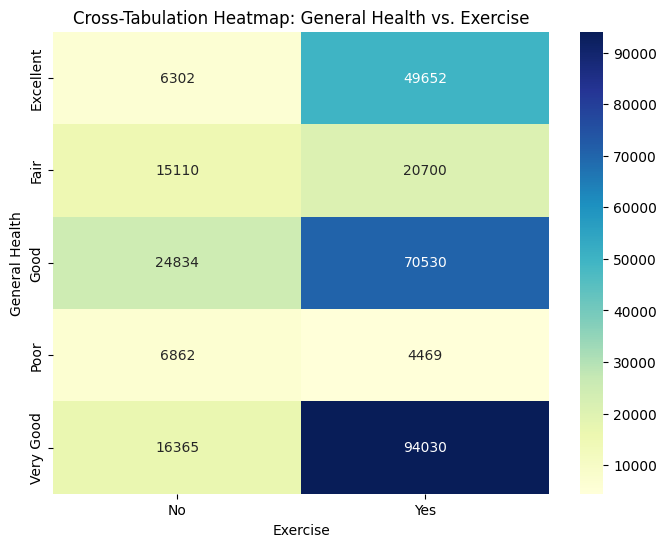

In [17]:
#General_Health and Exercise Cross-tab HeatMap
crosstab = pd.crosstab(df['General_Health'], df['Exercise'])
plt.figure(figsize=(8, 6))
sns.heatmap(crosstab, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Cross-Tabulation Heatmap: General Health vs. Exercise')
plt.xlabel('Exercise')
plt.ylabel('General Health')
plt.show()


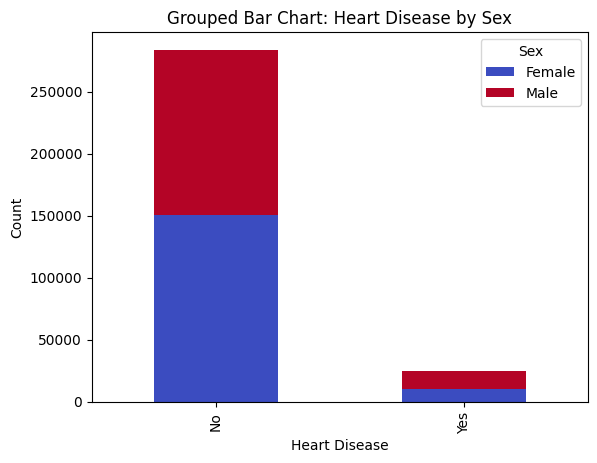

In [18]:
#Grouped Bar Chart for Hear_Disease and Sex
grouped = df.groupby(['Heart_Disease', 'Sex']).size().unstack()
grouped.plot(kind='bar', stacked=True, colormap='coolwarm')
plt.title('Grouped Bar Chart: Heart Disease by Sex')
plt.xlabel('Heart Disease')
plt.ylabel('Count')
plt.show()


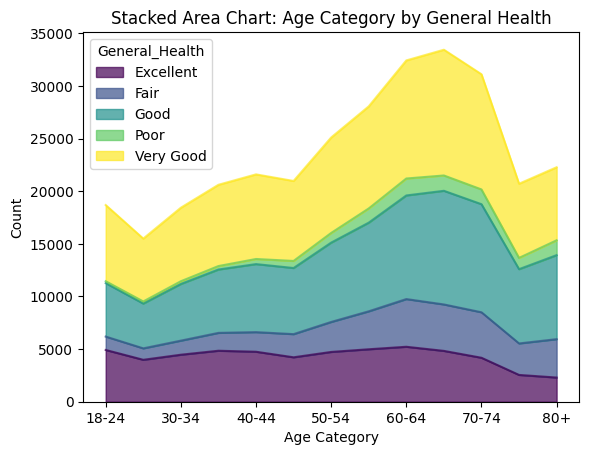

In [19]:
#Stacked Area Chart Age_Category by General_Health.
crosstab = pd.crosstab(df['Age_Category'], df['General_Health'])
crosstab.plot(kind='area', colormap='viridis', alpha=0.7, stacked=True)
plt.title('Stacked Area Chart: Age Category by General Health')
plt.xlabel('Age Category')
plt.ylabel('Count')
plt.show()

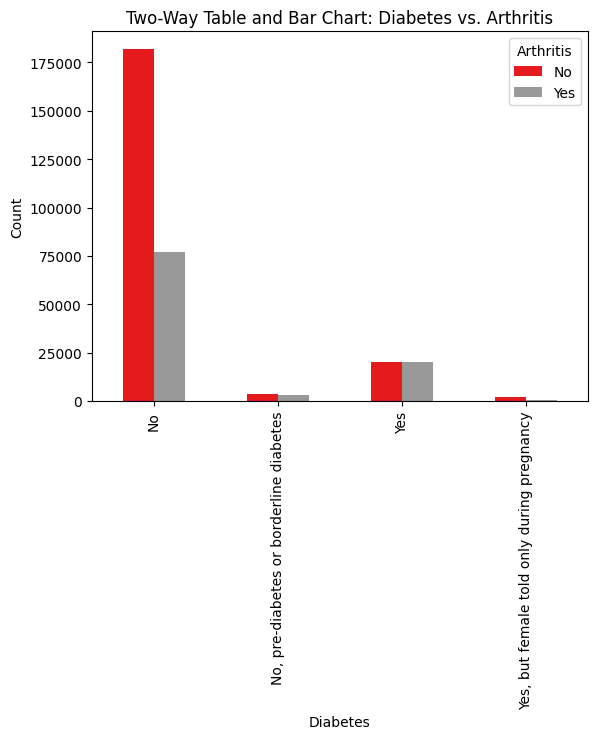

In [20]:
#Diabetes and Arthritis
table = pd.crosstab(df['Diabetes'], df['Arthritis'])
table.plot(kind='bar', colormap='Set1')
plt.title('Two-Way Table and Bar Chart: Diabetes vs. Arthritis')
plt.xlabel('Diabetes')
plt.ylabel('Count')
plt.show()


In [21]:
df_encoded = df.copy()
label_encoder = LabelEncoder()
for column in df_encoded.select_dtypes(include='object'):
    df_encoded[column] = label_encoder.fit_transform(df_encoded[column])
df.head()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150.0,32.66,14.54,Yes,0.0,30.0,16.0,12.0
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165.0,77.11,28.29,No,0.0,30.0,0.0,4.0
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,163.0,88.45,33.47,No,4.0,12.0,3.0,16.0
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,180.0,93.44,28.73,No,0.0,30.0,30.0,8.0
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,191.0,88.45,24.37,Yes,0.0,8.0,4.0,0.0


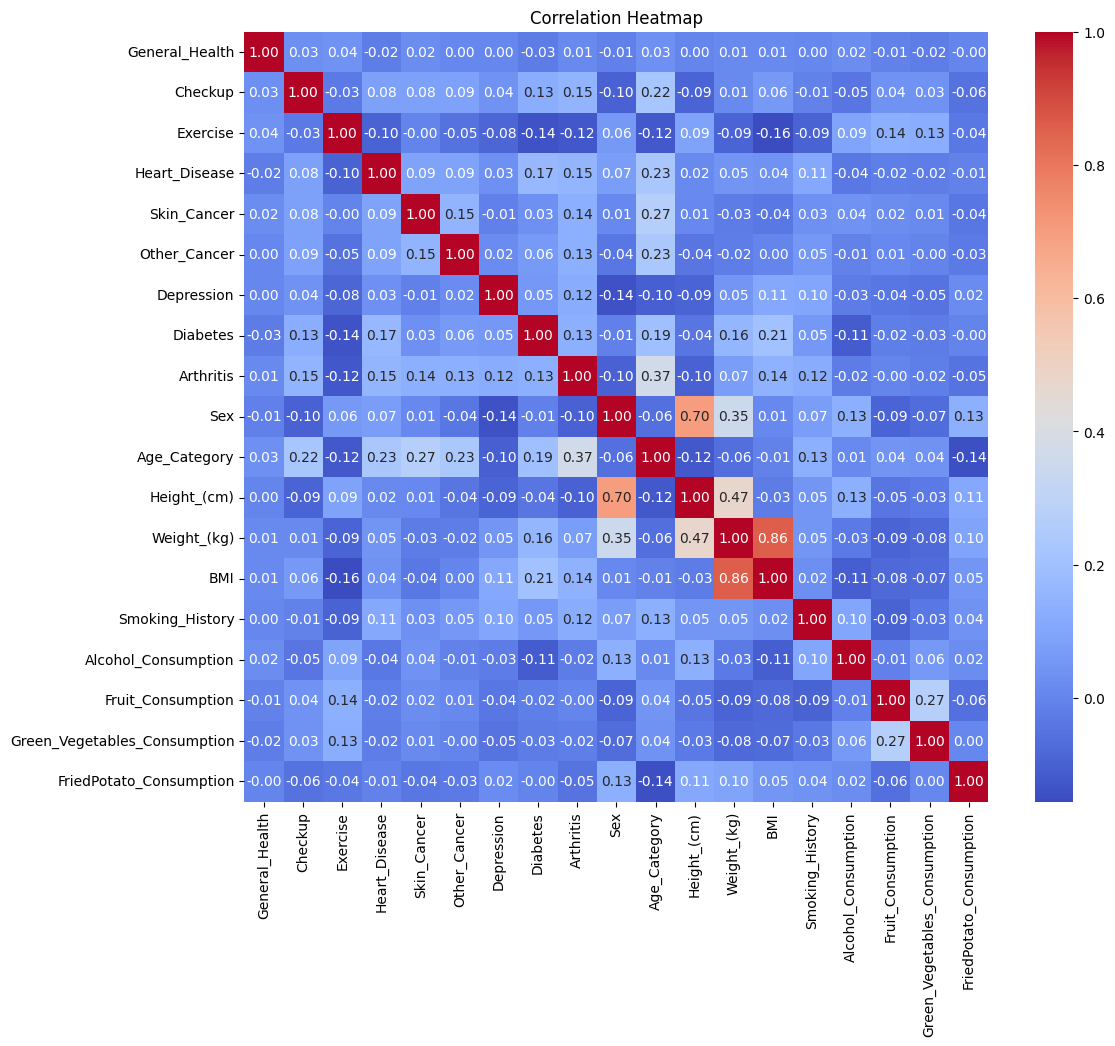

In [22]:
# Calculate the correlation matrix for Data
correlation_matrix = df_encoded.corr()

# Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


# **Check for class imbalance and sampling**

In [23]:
#CHECK THE CLASS VARIABLE
df_encoded['Heart_Disease'].value_counts()

Heart_Disease
0    283883
1     24971
Name: count, dtype: int64

In [24]:
X = df_encoded.drop("Heart_Disease", axis = 1)
y = df_encoded['Heart_Disease']

In [25]:
smote = SMOTE(random_state=42)
X_balanced, y_balanced = smote.fit_resample(X, y)

In [26]:
# Step 1: Define features and target variable
X = df_encoded.drop("Heart_Disease", axis=1)  # Features (all columns except 'Heart_Disease')
y = df_encoded["Heart_Disease"]  # Target variable

# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42)

In [27]:
X.head()

,General_Health,Checkup,Exercise,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,3,2,0,0,0,0,0,1,0,10,150.0,32.66,14.54,1,0.0,30.0,16.0,12.0
1,4,4,0,0,0,0,2,0,0,10,165.0,77.11,28.29,0,0.0,30.0,0.0,4.0
2,4,4,1,0,0,0,2,0,0,8,163.0,88.45,33.47,0,4.0,12.0,3.0,16.0
3,3,4,1,0,0,0,2,0,1,11,180.0,93.44,28.73,0,0.0,30.0,30.0,8.0
4,2,4,0,0,0,0,0,0,1,12,191.0,88.45,24.37,1,0.0,8.0,4.0,0.0


In [28]:
y.head()

0    0
1    1
2    0
3    1
4    0
Name: Heart_Disease, dtype: int64

# **REMOVE OUTLIERS WITH IQR**

In [29]:
# Define the columns to remove outliers
selected_columns = ['Height_(cm)', 'Weight_(kg)', 'BMI', 'Alcohol_Consumption', 
                    'Fruit_Consumption', 'Green_Vegetables_Consumption', 'FriedPotato_Consumption']

# Calculate the IQR for the selected columns in the training data
Q1 = X_train[selected_columns].quantile(0.25)
Q3 = X_train[selected_columns].quantile(0.75)
IQR = Q3 - Q1

# SetTING a threshold value for outlier detection (e.g., 1.5 times the IQR)
threshold = 1.5

# CreatING a mask for outliers in the selected columns
outlier_mask = (
    (X_train[selected_columns] < (Q1 - threshold * IQR)) |
    (X_train[selected_columns] > (Q3 + threshold * IQR))
).any(axis=1)

# Remove rows with outliers from X_train and y_train
X_train_clean = X_train[~outlier_mask]
y_train_clean = y_train[~outlier_mask]

# Print the number of rows removed
num_rows_removed = len(X_train) - len(X_train_clean)
print(f"Number of rows removed due to outliers: {num_rows_removed}")


Number of rows removed due to outliers: 186147


# **Linear Regression**

In [30]:
lr_model = LinearRegression()
lr_model.fit(X_train_clean, y_train_clean)

# Make predictions on the test set
lr_predictions = lr_model.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, lr_predictions)
mae = mean_absolute_error(y_test, lr_predictions)
print(f"Linear Regression Mean Squared Error: {mse:.2f}")
print(f"Linear Regression Mean Absolute Error: {mae:.2f}")


Linear Regression Mean Squared Error: 0.18
Linear Regression Mean Absolute Error: 0.36


# **Logistic Regression**

Logistic Regression Accuracy: 0.73
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.77      0.74     56701
           1       0.75      0.70      0.72     56853

    accuracy                           0.73    113554
   macro avg       0.73      0.73      0.73    113554
weighted avg       0.73      0.73      0.73    113554



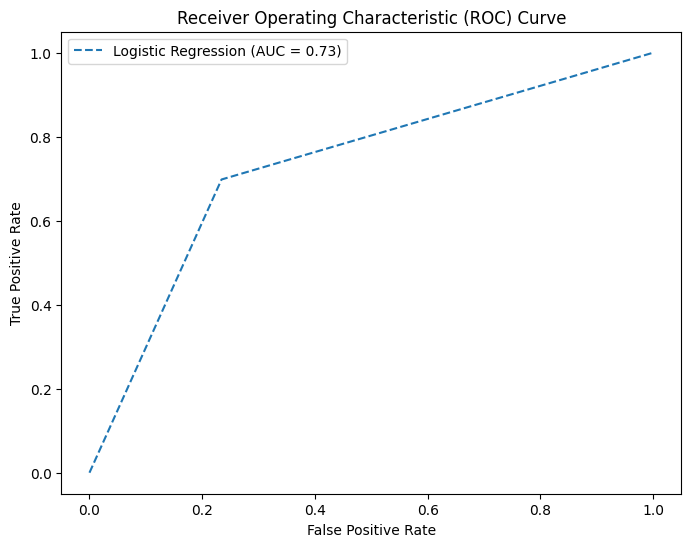

In [31]:
logistic_model = LogisticRegression()
logistic_model.fit(X_train_clean, y_train_clean)

# Make predictions on the test set
logistic_predictions = logistic_model.predict(X_test)

# Calculate AUC
logistic_auc = roc_auc_score(y_test, logistic_predictions)

# Generate ROC curve
fpr, tpr, _ = roc_curve(y_test, logistic_predictions)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, logistic_predictions)
print(f"Logistic Regression Accuracy: {accuracy:.2f}")
print("Logistic Regression Classification Report:")
print(classification_report(y_test, logistic_predictions))

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, linestyle='--', label='Logistic Regression (AUC = %0.2f)' % logistic_auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()


# **Lasso-Ridge Regression**

In [32]:
lasso_model = Lasso(alpha=0.01)
ridge_model = Ridge(alpha=0.01)
lasso_model.fit(X_train_clean, y_train_clean)
ridge_model.fit(X_train_clean, y_train_clean)

# Make predictions on the test set
lasso_predictions = lasso_model.predict(X_test)
ridge_predictions = ridge_model.predict(X_test)


In [33]:
# Evaluate the models' performance
mse_lasso = mean_squared_error(y_test, lasso_predictions)
mae_lasso = mean_absolute_error(y_test, lasso_predictions)
mse_ridge = mean_squared_error(y_test, ridge_predictions)
mae_ridge = mean_absolute_error(y_test, ridge_predictions)


In [34]:
print("Lasso Regression:")
print(f"Mean Squared Error: {mse_lasso:.2f}")
print(f"Mean Absolute Error: {mae_lasso:.2f}")

print("\nRidge Regression:")
print(f"Mean Squared Error: {mse_ridge:.2f}")
print(f"Mean Absolute Error: {mae_ridge:.2f}")

Lasso Regression:
Mean Squared Error: 0.19
Mean Absolute Error: 0.37

Ridge Regression:
Mean Squared Error: 0.18
Mean Absolute Error: 0.36


# **Decision Tree Classifier**

Decision Tree Classifier Accuracy: 0.83
Decision Tree Classifier Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.84      0.84     56701
           1       0.84      0.82      0.83     56853

    accuracy                           0.83    113554
   macro avg       0.83      0.83      0.83    113554
weighted avg       0.83      0.83      0.83    113554



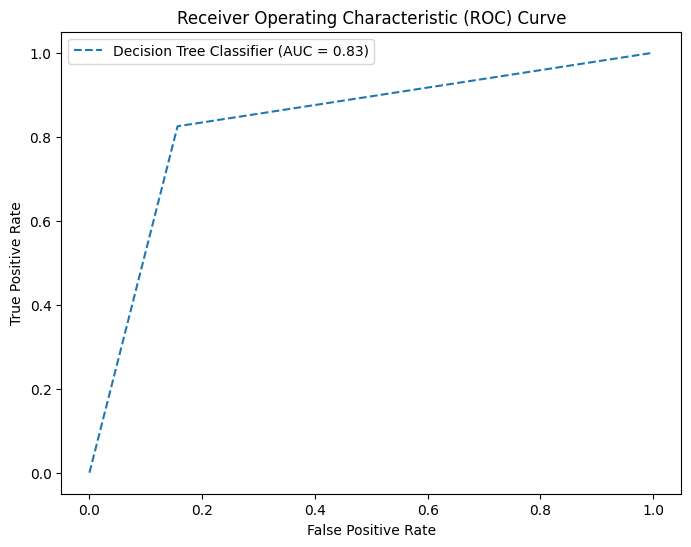

In [35]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_clean, y_train_clean)

# Make predictions on the test set
dt_predictions = dt_model.predict(X_test)

# Calculate AUC
dt_auc = roc_auc_score(y_test, dt_predictions)

# Generate ROC curve
fpr, tpr, _ = roc_curve(y_test, dt_predictions)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, dt_predictions)
print(f"Decision Tree Classifier Accuracy: {accuracy:.2f}")
print("Decision Tree Classifier Classification Report:")
print(classification_report(y_test, dt_predictions))

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, linestyle='--', label='Decision Tree Classifier (AUC = %0.2f)' % dt_auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()


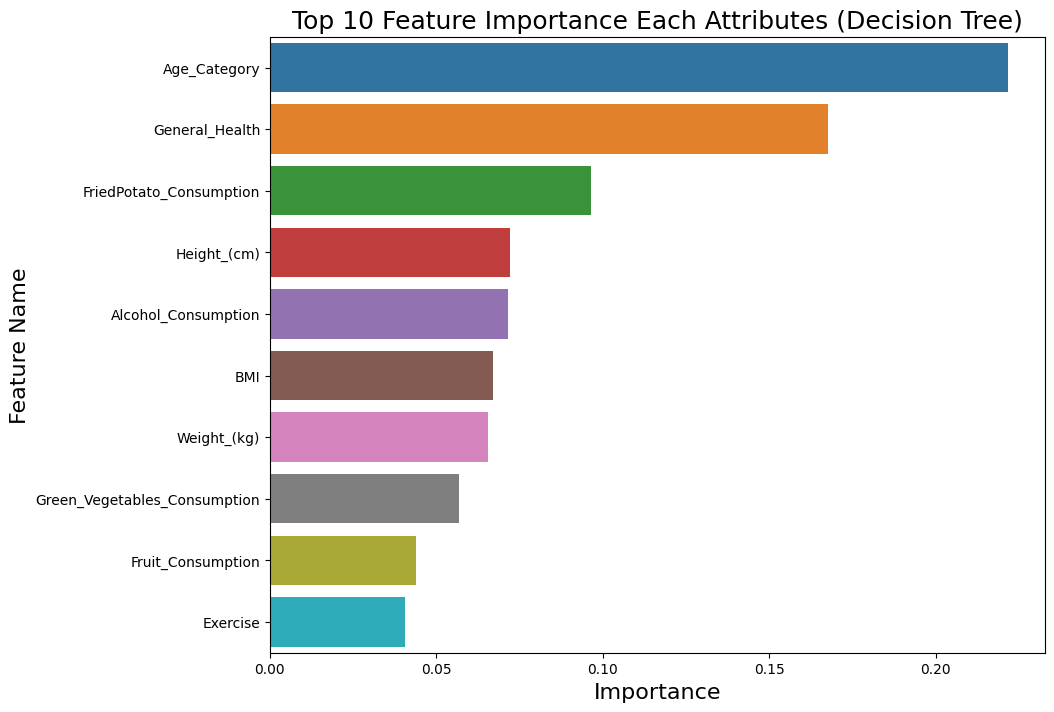

In [36]:
imp_df = pd.DataFrame({
    "Feature Name": X_train_clean.columns,
    "Importance": dt_model.feature_importances_
})
fi = imp_df.sort_values(by="Importance", ascending=False)

fi2 = fi.head(10)
plt.figure(figsize=(10,8))
sns.barplot(data=fi2, x='Importance', y='Feature Name')
plt.title('Top 10 Feature Importance Each Attributes (Decision Tree)', fontsize=18)
plt.xlabel ('Importance', fontsize=16)
plt.ylabel ('Feature Name', fontsize=16)
plt.show()

# **Random Forest Classifier**

Random Forest Classifier Accuracy: 0.89
Random Forest Classifier Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.94      0.89     56701
           1       0.93      0.84      0.88     56853

    accuracy                           0.89    113554
   macro avg       0.89      0.89      0.89    113554
weighted avg       0.89      0.89      0.89    113554



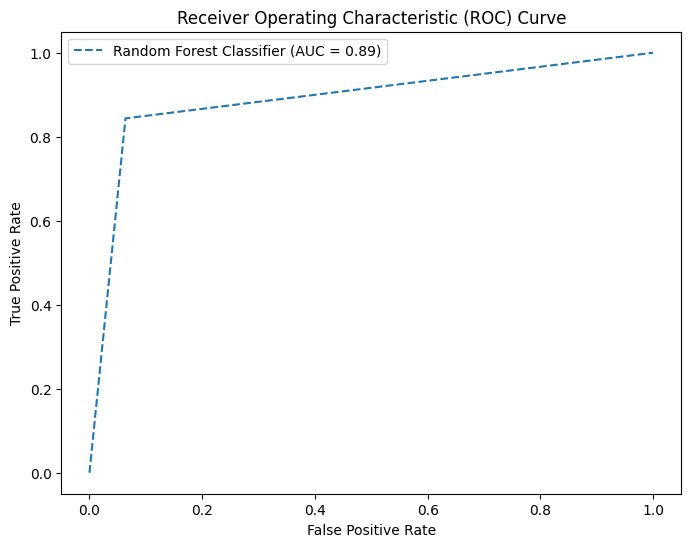

In [37]:

# Create and train the Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_clean, y_train_clean)

# Make predictions on the test set
rf_predictions = rf_model.predict(X_test)

# Calculate AUC
rf_auc = roc_auc_score(y_test, rf_predictions)

# Generate ROC curve
fpr, tpr, _ = roc_curve(y_test, rf_predictions)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, rf_predictions)
print(f"Random Forest Classifier Accuracy: {accuracy:.2f}")
print("Random Forest Classifier Classification Report:")
print(classification_report(y_test, rf_predictions))

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, linestyle='--', label='Random Forest Classifier (AUC = %0.2f)' % rf_auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()


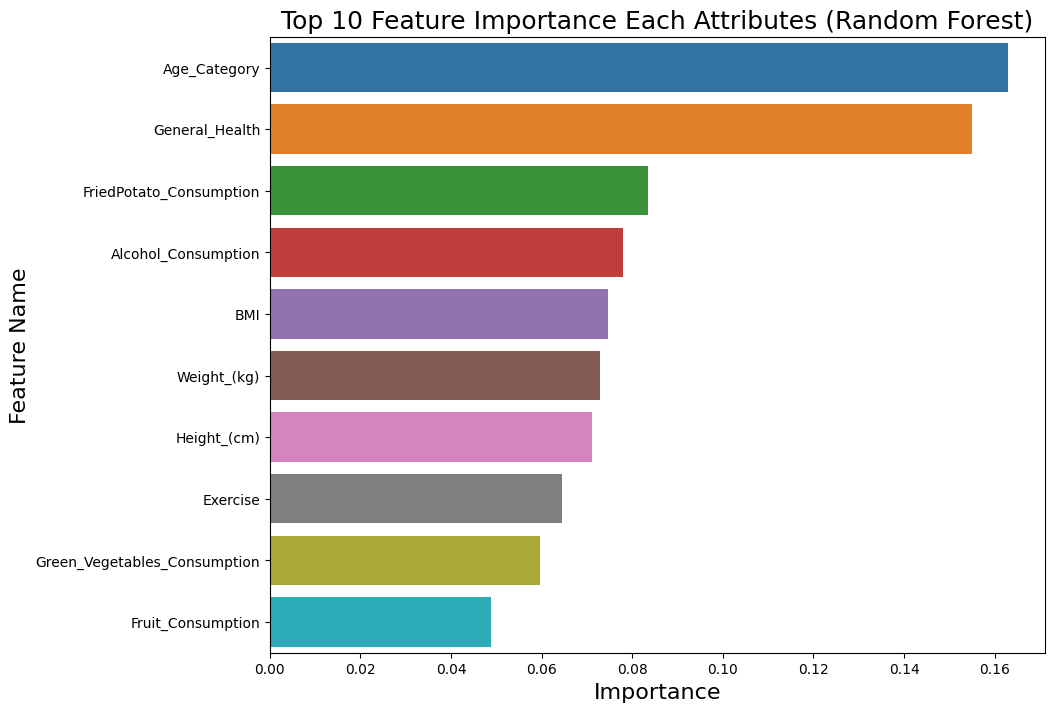

In [38]:
imp_df = pd.DataFrame({
    "Feature Name": X_train_clean.columns,
    "Importance": rf_model.feature_importances_
})
fi = imp_df.sort_values(by="Importance", ascending=False)

fi2 = fi.head(10)
plt.figure(figsize=(10,8))
sns.barplot(data=fi2, x='Importance', y='Feature Name')
plt.title('Top 10 Feature Importance Each Attributes (Random Forest)', fontsize=18)
plt.xlabel ('Importance', fontsize=16)
plt.ylabel ('Feature Name', fontsize=16)
plt.show()

# **Plot the AUC comparision**

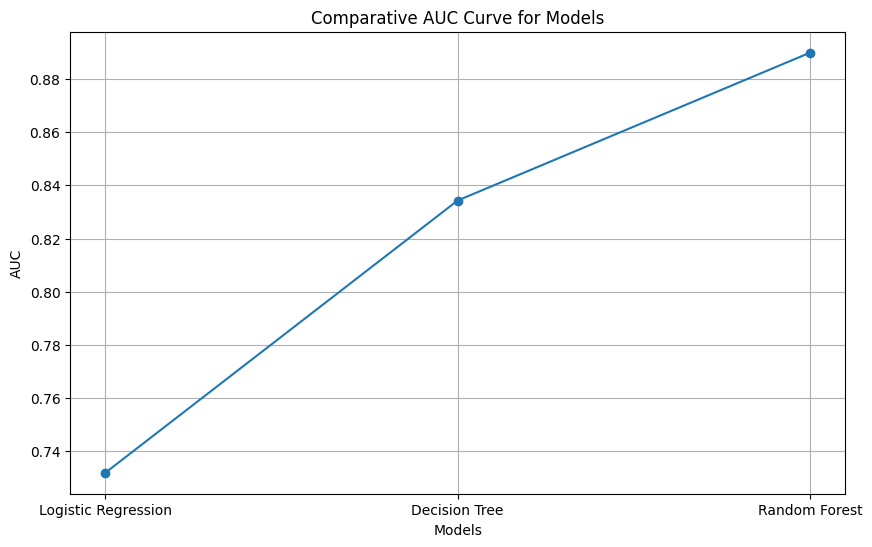

In [39]:
import matplotlib.pyplot as plt

# AUC values for each model
auc_values = [logistic_auc, dt_auc, rf_auc]

# Model names
model_names = ["Logistic Regression", "Decision Tree", "Random Forest"]  

# Plot the AUC values
plt.figure(figsize=(10, 6))
plt.plot(model_names, auc_values, marker='o', linestyle='-')
plt.title('Comparative AUC Curve for Models')
plt.xlabel('Models')
plt.ylabel('AUC')
plt.grid(True)
plt.show()


In [40]:
new_input = np.array([3, 2, 0, 0, 0, 0, 0, 1, 0, 10, 150.0, 32.66, 14.54, 1, 0.0, 30.0, 16.0, 12.0])

# Reshape the input to match the shape used during training
new_input_reshaped = new_input.reshape(1, -1)  # Reshape to a 2D array

# Making a prediction using the trained model
prediction = rf_model.predict(new_input_reshaped)

if prediction == 0:
    print("Prediction: No heart disease")
elif prediction == 1:
    print("Prediction: Heart disease present")
else:
    print("Unknown prediction")

Prediction: No heart disease


In [41]:
import pickle

# dump information to that file
pickle.dump(rf_model, open('newmodel.pkl', 'wb'))